In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
CAD = pd.read_csv("/kaggle/input/classification-of-coronary-artery-disease/CAD.csv")
HF = pd.read_csv("/kaggle/input/heart-failure/HDHI Admission data.csv")
ECHO = pd.read_csv("/kaggle/input/echo11/FinalClusters.csv")

# Processing ECHONET data

In [4]:
ECHO.head()

,FileName,EF,ESV,EDV,FrameHeight,FrameWidth,FPS,NumberOfFrames,Split,clusterID
0,0X100009310A3BD7FC,78.498406,14.881368,69.210534,112,112,50,174,VAL,0
1,0X1002E8FBACD08477,59.101988,40.383876,98.742884,112,112,50,215,TRAIN,0
2,0X1005D03EED19C65B,62.363798,14.267784,37.909734,112,112,50,104,TRAIN,0
3,0X10075961BC11C88E,54.545097,33.143084,72.914210,112,112,55,122,TRAIN,2
4,0X10094BA0A028EAC3,24.887742,127.581945,169.855024,112,112,52,207,VAL,1


In [5]:
ECHO = ECHO[['EF', 'ESV', 'EDV', 'clusterID']]

In [6]:
ECHO.head()

,EF,ESV,EDV,clusterID
0,78.498406,14.881368,69.210534,0
1,59.101988,40.383876,98.742884,0
2,62.363798,14.267784,37.909734,0
3,54.545097,33.143084,72.914210,2
4,24.887742,127.581945,169.855024,1


In [7]:
ECHO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10030 entries, 0 to 10029
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EF         10030 non-null  float64
 1   ESV        10030 non-null  float64
 2   EDV        10030 non-null  float64
 3   clusterID  10030 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 313.6 KB


# Processing Heart Failure

In [8]:
HF.head()

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0


In [9]:
HF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   SNO                              15757 non-null  int64 
 1   MRD No.                          15757 non-null  object
 2   D.O.A                            15757 non-null  object
 3   D.O.D                            15757 non-null  object
 4   AGE                              15757 non-null  int64 
 5   GENDER                           15757 non-null  object
 6   RURAL                            15757 non-null  object
 7   TYPE OF ADMISSION-EMERGENCY/OPD  15757 non-null  object
 8   month year                       15757 non-null  object
 9   DURATION OF STAY                 15757 non-null  int64 
 10  duration of intensive unit stay  15757 non-null  int64 
 11  OUTCOME                          15757 non-null  object
 12  SMOKING                         

In [10]:
# Clean and convert to numeric (float first)
HF['EF'] = HF['EF'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
HF['EF'] = pd.to_numeric(HF['EF'], errors='coerce')

HF = HF.dropna(subset=['EF'])
HF['EF'] = HF['EF'].astype(int)  # Final conversion to integer

# Verify
print(HF['EF'].dtype)  # Should show 'int64'
print(HF['EF'])  # Should be 0


int64
0        35
1        42
3        42
4        16
5        25
         ..
15752    38
15753    28
15754    32
15755    60
15756    60
Name: EF, Length: 14158, dtype: int64


In [11]:
HF.dropna(inplace=True)

In [12]:
HF.drop(columns=['CAD', 'SNO', 'D.O.D', 'D.O.A', 'MRD No.', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY', 'duration of intensive unit stay', 'OUTCOME'], inplace=True)

# Processing CAD data

In [13]:
CAD.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal


In [14]:
CAD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

In [15]:
columns_to_drop = [
     'Length', 'EX-Smoker', 'Thyroid Disease', 
    'Airway disease', 'ESR', 'Lymph', 'Neut', 'FH', 'Weak Peripheral Pulse', 
    'Lung rales', 'Poor R Progression', 'Atypical', 'Nonanginal', 'Exertional CP',
    'Systolic Murmur', 'Diastolic Murmur', 'Q Wave', 'St Elevation', 
    'St Depression', 'Tinversion', 'LVH'
]
CAD = CAD.drop(columns=columns_to_drop)

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


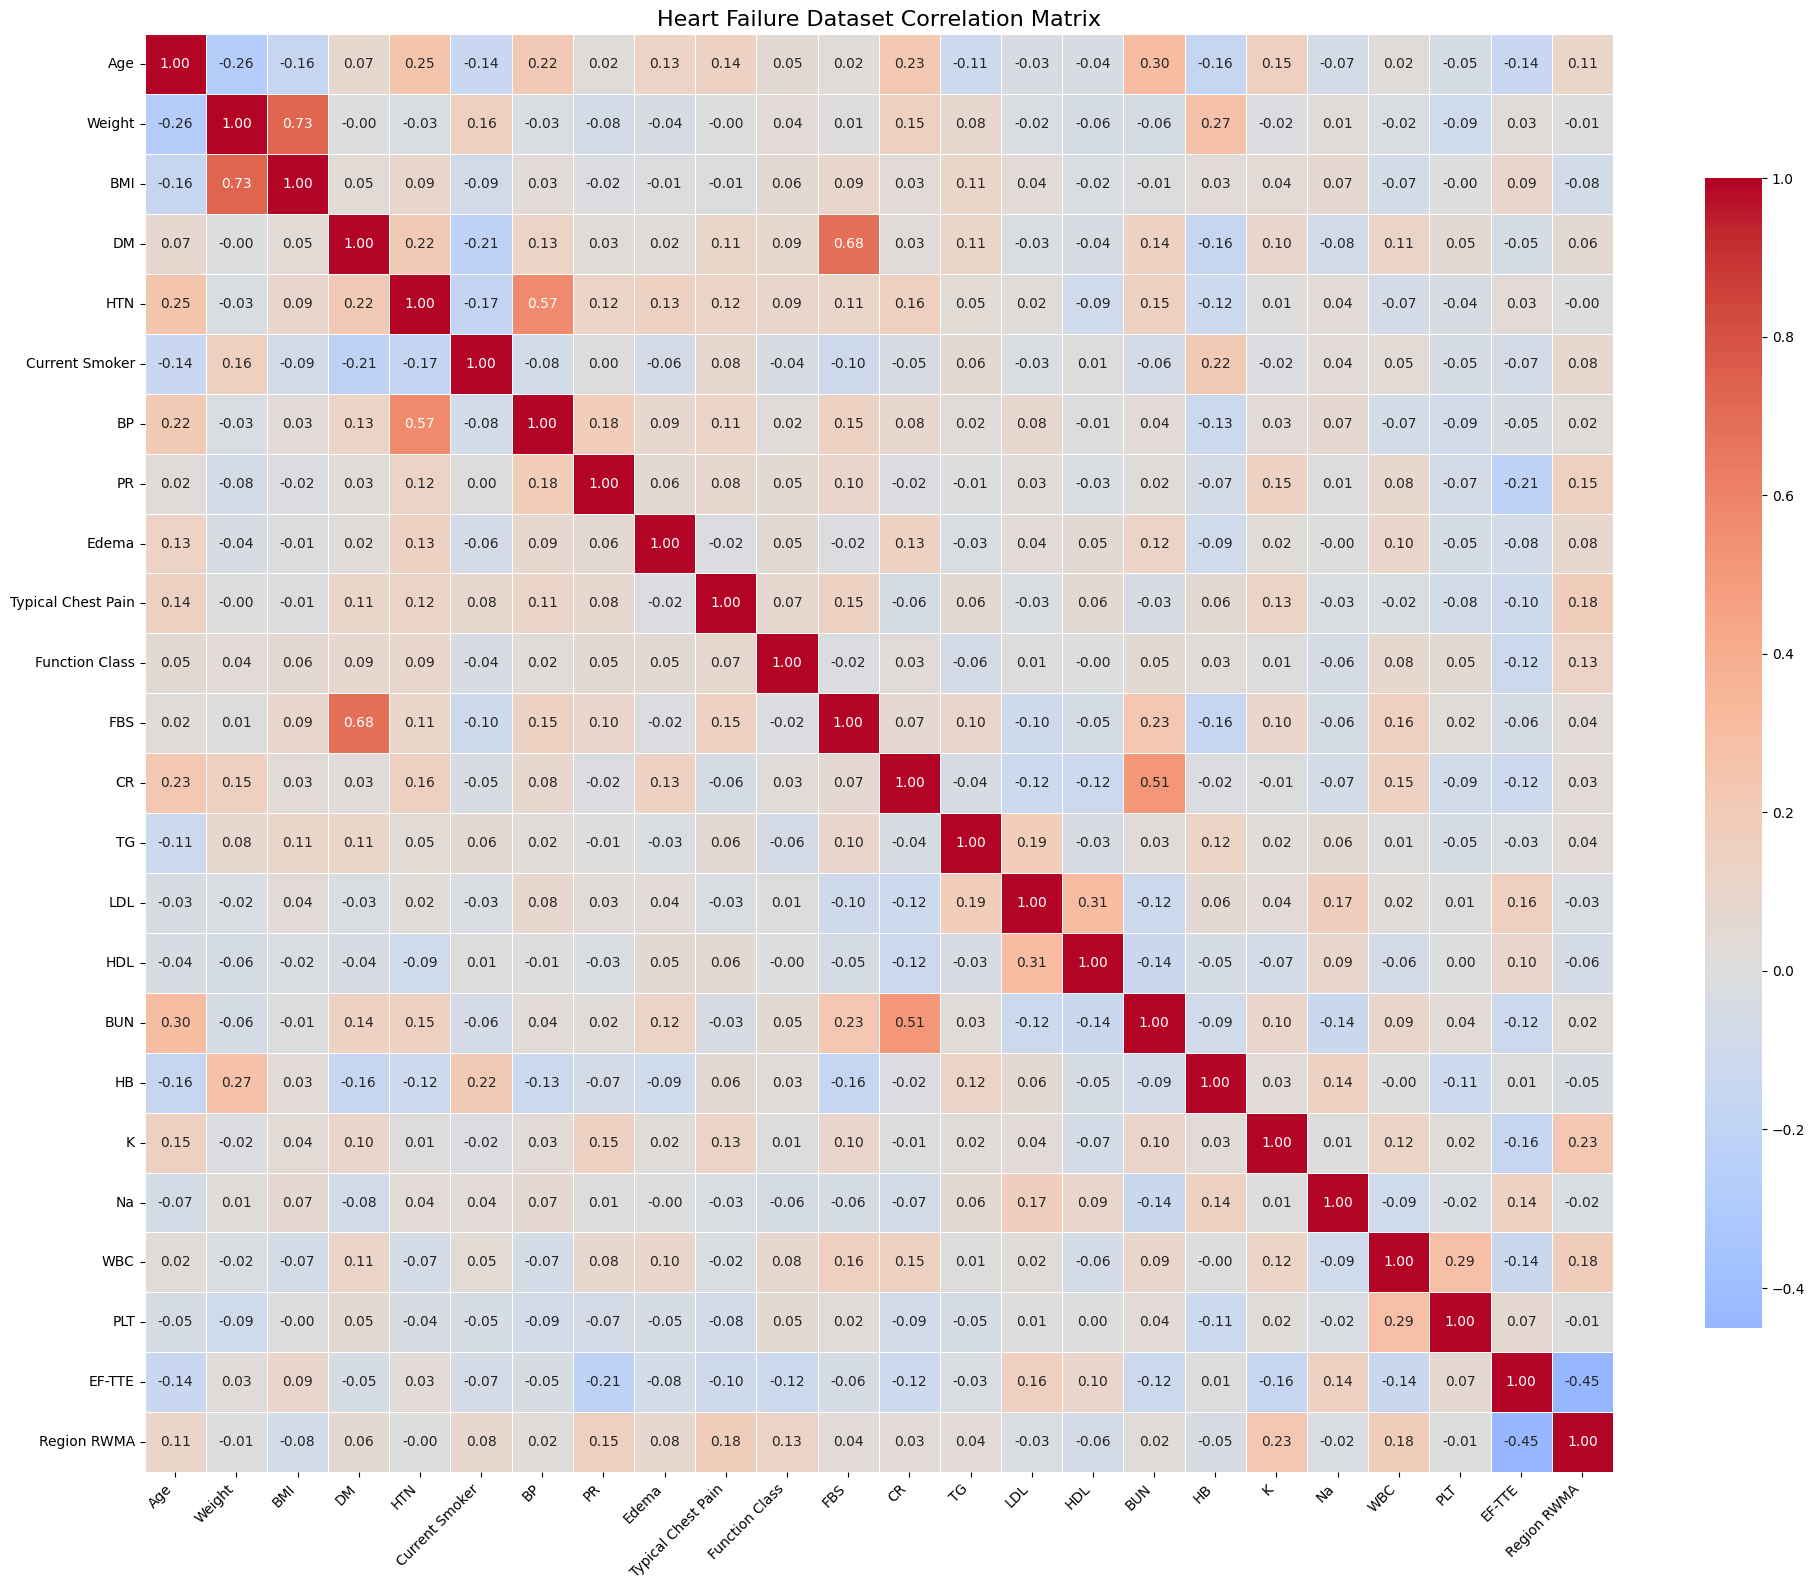

In [16]:
numeric_cols = CAD.select_dtypes(include=['int64', 'float64']).columns
df_numeric = CAD[numeric_cols]
corr_matrix = df_numeric.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    center=0,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)
plt.title("Heart Failure Dataset Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [17]:
CAD = CAD.rename(columns={'EF-TTE': 'EF'})

# Merging of HF and CAD

In [18]:
CAD = CAD.sort_values('EF')
HF = HF.sort_values('EF')

In [19]:
tolerance = 5
merged = pd.merge_asof(
    HF, 
    CAD, 
    on='EF', 
    direction='nearest', 
    tolerance=tolerance
)

In [20]:
merged.head()

,AGE,GENDER,SMOKING,ALCOHOL,DM_x,HTN_x,PRIOR CMP,CKD,HB_x,TLC,...,HDL,BUN,HB_y,K,Na,WBC,PLT,Region RWMA,VHD,Cath
0,67,M,0,0,0,0,1,1,7.3,7.8,...,36.0,30,13.3,4.9,138,5700,187,0,Moderate,Normal
1,55,M,0,0,0,1,1,1,14.3,12.9,...,36.0,30,13.3,4.9,138,5700,187,0,Moderate,Normal
2,76,F,0,0,1,0,1,1,9.4,16.5,...,36.0,30,13.3,4.9,138,5700,187,0,Moderate,Normal
3,54,M,0,0,0,0,1,0,16,7.6,...,36.0,30,13.3,4.9,138,5700,187,0,Moderate,Normal
4,66,M,0,0,0,1,1,1,13.4,23.6,...,36.0,30,13.3,4.9,138,5700,187,0,Moderate,Normal


In [21]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6467 entries, 0 to 6466
Data columns (total 78 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AGE                        6467 non-null   int64  
 1   GENDER                     6467 non-null   object 
 2   SMOKING                    6467 non-null   int64  
 3   ALCOHOL                    6467 non-null   int64  
 4   DM_x                       6467 non-null   int64  
 5   HTN_x                      6467 non-null   int64  
 6   PRIOR CMP                  6467 non-null   int64  
 7   CKD                        6467 non-null   int64  
 8   HB_x                       6467 non-null   object 
 9   TLC                        6467 non-null   object 
 10  PLATELETS                  6467 non-null   object 
 11  GLUCOSE                    6467 non-null   object 
 12  UREA                       6467 non-null   object 
 13  CREATININE                 6467 non-null   objec

# Merge with ECHO-NET

In [22]:
ECHO['EF'] = ECHO['EF'].astype(int)

In [23]:
merged = merged.sort_values('EF')
ECHO = ECHO.sort_values('EF')

In [24]:
tolerance = 5
final = pd.merge_asof(
    ECHO, 
    merged, 
    on='EF', 
    direction='nearest', 
    tolerance=tolerance
)

In [25]:
final.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,EF,ESV,EDV,clusterID,AGE,GENDER,SMOKING,ALCOHOL,DM_x,HTN_x,...,HDL,BUN,HB_y,K,Na,WBC,PLT,Region RWMA,VHD,Cath
0,6,33.987498,36.509288,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,181.308046,196.475254,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,320.860228,352.252030,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,294.507351,322.837168,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,166.703865,184.313281,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10030 entries, 0 to 10029
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EF                         10030 non-null  int64  
 1   ESV                        10030 non-null  float64
 2   EDV                        10030 non-null  float64
 3   clusterID                  10030 non-null  int64  
 4   AGE                        8584 non-null   float64
 5   GENDER                     8584 non-null   object 
 6   SMOKING                    8584 non-null   float64
 7   ALCOHOL                    8584 non-null   float64
 8   DM_x                       8584 non-null   float64
 9   HTN_x                      8584 non-null   float64
 10  PRIOR CMP                  8584 non-null   float64
 11  CKD                        8584 non-null   float64
 12  HB_x                       8584 non-null   object 
 13  TLC                        8584 non-null   obj

In [27]:
final.isnull().sum()

EF                0
ESV               0
EDV               0
clusterID         0
AGE            1446
               ... 
WBC            1446
PLT            1446
Region RWMA    1446
VHD            1446
Cath           1446
Length: 81, dtype: int64

In [28]:
final.dropna(inplace=True)

In [29]:
final.duplicated().sum()

0

In [30]:
def generate_hb(row):
    if row['Sex'] == 'Male':
        if row['SEVERE ANAEMIA'] == 1:
            return round(np.random.uniform(5.0, 7.9), 1)
        elif row['ANAEMIA'] == 1:
            return round(np.random.uniform(8.0, 12.9), 1)
        else:
            return round(np.random.uniform(13.0, 17.0), 1)
    elif row['Sex'] == 'Female':
        if row['SEVERE ANAEMIA'] == 1:
            return round(np.random.uniform(5.0, 7.9), 1)
        elif row['ANAEMIA'] == 1:
            return round(np.random.uniform(8.0, 11.9), 1)
        else:
            return round(np.random.uniform(12.0, 15.0), 1)
    else:
        return np.nan  # Or handle other/unknown categories

final['Hemoglobin'] = final.apply(generate_hb, axis=1)

In [31]:
columns_to_drop = [
    'DM_x', 'HTN_x', 'HB_x', 'Age', 
    'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC', 
    'DVT', 'PSVT',
    'SHOCK', 'CVA BLEED', 'STABLE ANGINA', 'Current Smoker',
    'TLC', 'CRF', 'PLATELETS',
    'GENDER', 'EDV', 'ESV', 'WBC', 'PLT', 'CVA', 'ATYPICAL CHEST PAIN', 'Cath', 'CVA INFRACT',
    'CHF', 'INFECTIVE ENDOCARDITIS', 'LowTH Ang', 'Typical Chest Pain',
    'Region RWMA', 'ANAEMIA', 'SEVERE ANAEMIA'
]

final = final.drop(columns=columns_to_drop)

In [32]:
# Clean and convert to numeric (float first)
final['GLUCOSE'] = final['GLUCOSE'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
final['GLUCOSE'] = pd.to_numeric(HF['GLUCOSE'], errors='coerce')

final = final.dropna(subset=['GLUCOSE'])
final['GLUCOSE'] = final['GLUCOSE'].astype(float)

# Clean and convert to numeric (float first)
final['UREA'] = final['UREA'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
final['UREA'] = pd.to_numeric(HF['UREA'], errors='coerce')

final = final.dropna(subset=['UREA'])
final['UREA'] = final['UREA'].astype(float)

final['CREATININE'] = final['CREATININE'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
final['CREATININE'] = pd.to_numeric(HF['CREATININE'], errors='coerce')

final = final.dropna(subset=['CREATININE'])
final['CREATININE'] = final['CREATININE'].astype(float)


final['BNP'] = final['BNP'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
final['BNP'] = pd.to_numeric(HF['BNP'], errors='coerce')

final = final.dropna(subset=['BNP'])
final['BNP'] = final['BNP'].astype(float)

In [33]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2312 entries, 10 to 8589
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EF                      2312 non-null   int64  
 1   clusterID               2312 non-null   int64  
 2   AGE                     2312 non-null   float64
 3   SMOKING                 2312 non-null   float64
 4   ALCOHOL                 2312 non-null   float64
 5   PRIOR CMP               2312 non-null   float64
 6   CKD                     2312 non-null   float64
 7   GLUCOSE                 2312 non-null   float64
 8   UREA                    2312 non-null   float64
 9   CREATININE              2312 non-null   float64
 10  BNP                     2312 non-null   float64
 11  RAISED CARDIAC ENZYMES  2312 non-null   float64
 12  ACS                     2312 non-null   float64
 13  STEMI                   2312 non-null   float64
 14  HEART FAILURE           2312 non-null   floa

In [34]:
final.to_csv('final.csv', index=False)

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


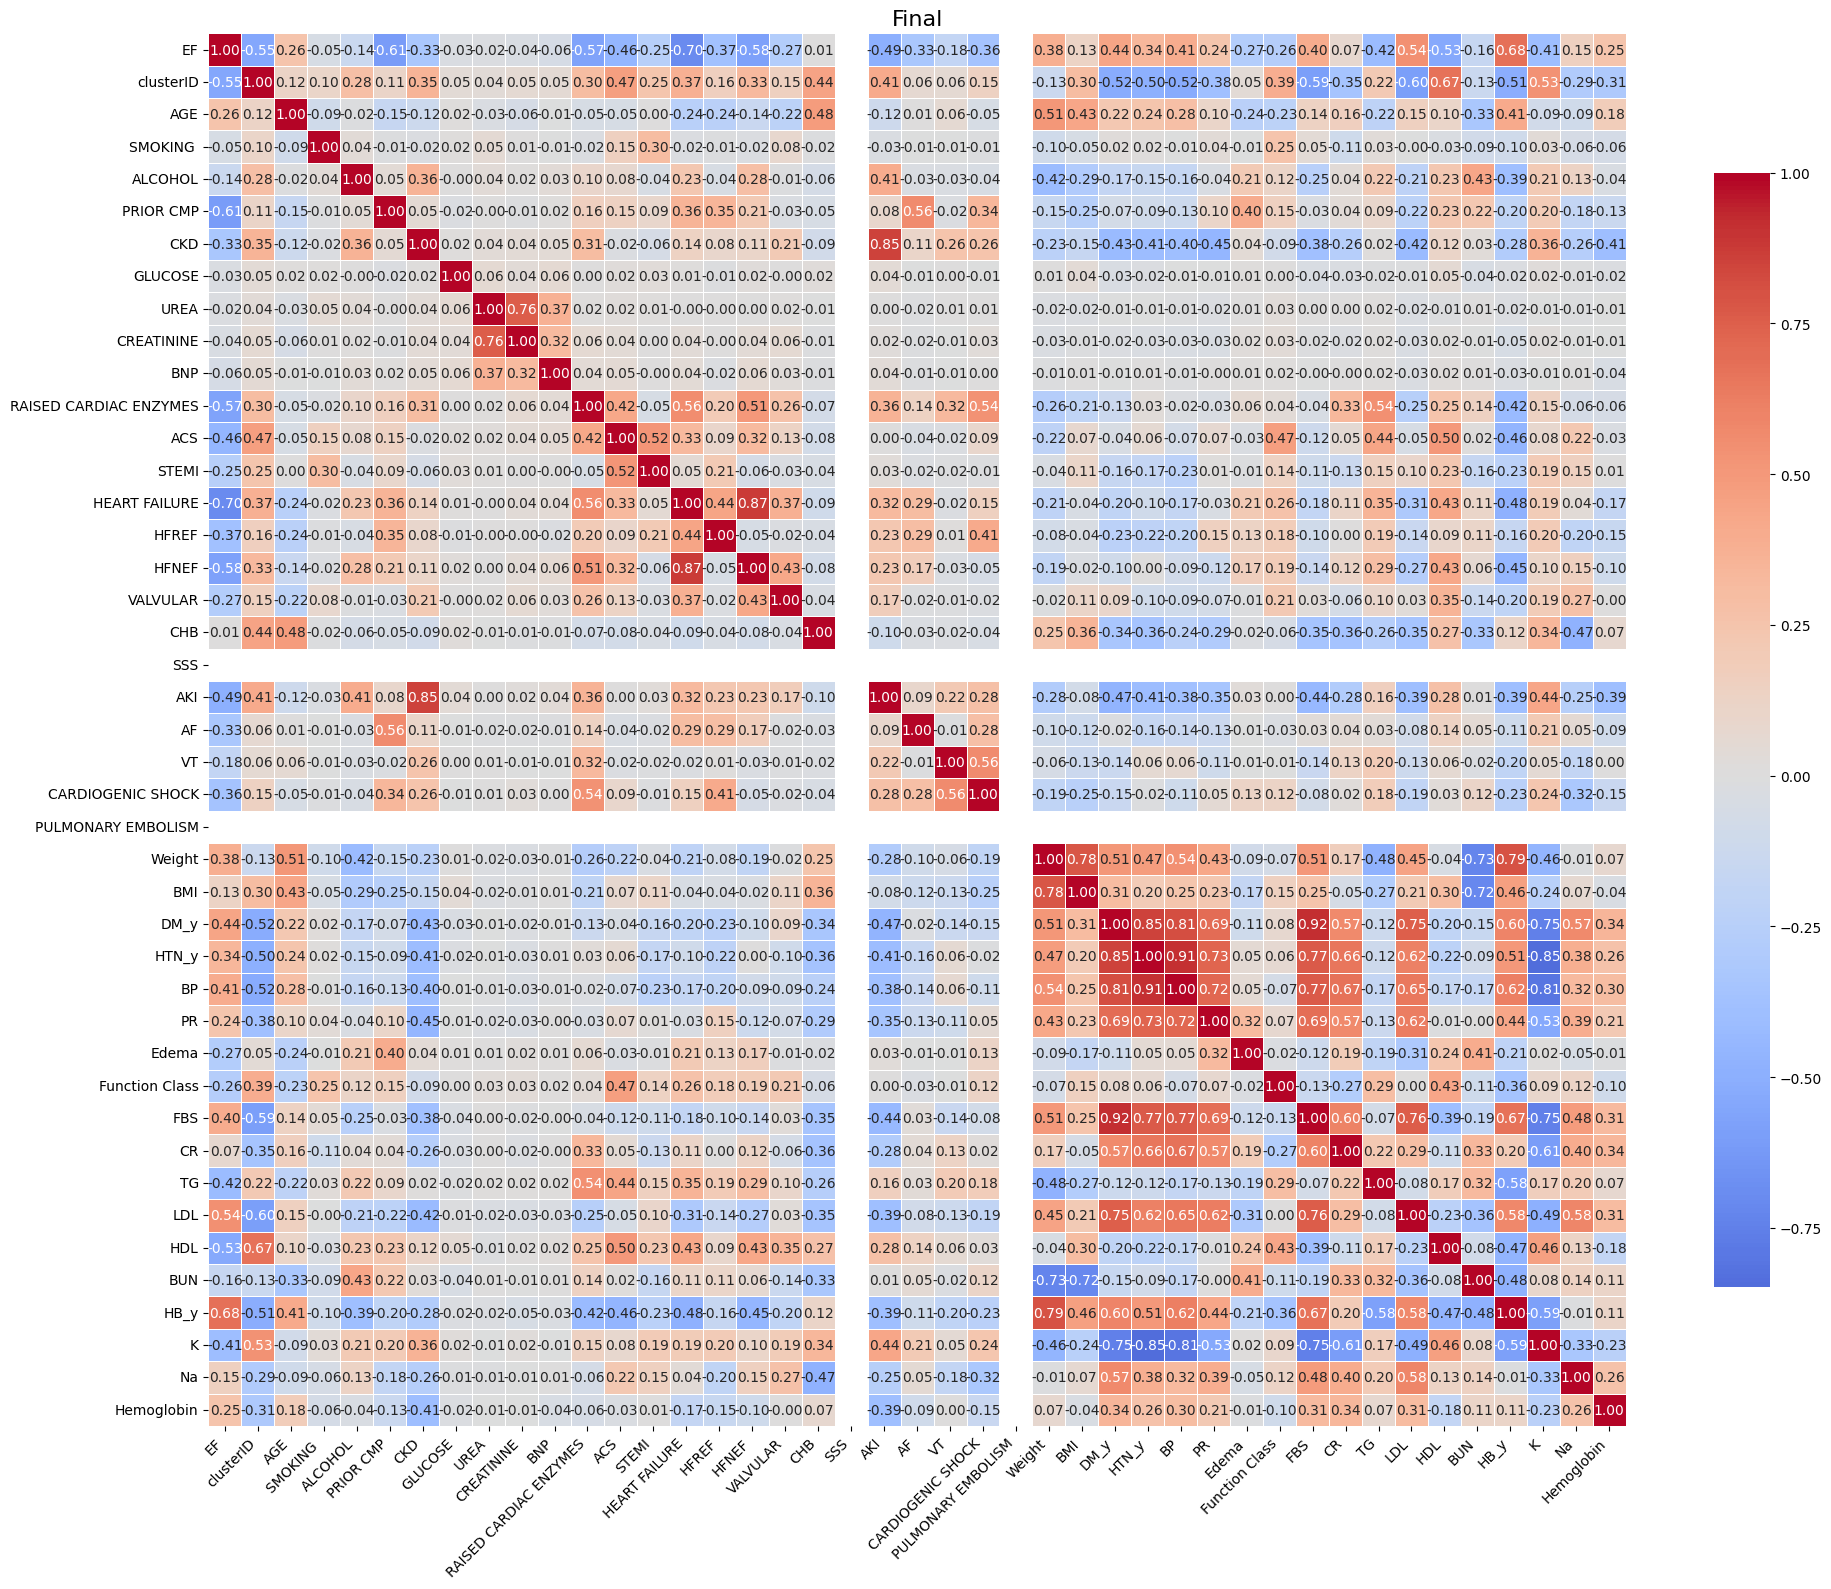

In [35]:
numeric_cols = final.select_dtypes(include=['int64', 'float64']).columns
df_numeric = final[numeric_cols]
corr_matrix = df_numeric.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    center=0,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)
plt.title("Final", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Prediction

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features and target
X = final.drop(columns=['clusterID'])
y = final['clusterID']

# Advanced imputation (KNN-based)
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X.select_dtypes(include=np.number))

# Scale numeric features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Encode categoricals
encoder = OneHotEncoder(handle_unknown='ignore')
X_cat = encoder.fit_transform(X.select_dtypes(include='object'))

# Feature selection (ANOVA F-test)
selector = SelectKBest(f_classif, k=30)
X_selected = selector.fit_transform(X_scaled, y)

# Combine processed features
X_processed = np.hstack([X_selected, X_cat.toarray()])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [18 23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)

# Step 2: Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Step 3: Define the improved model
class ImprovedHFNet(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(),
            nn.Dropout(0.4),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(),
            nn.Dropout(0.2),

            nn.Linear(64, output_size)
        )

    def forward(self, x):
        return self.net(x)

# Step 4: Convert data to tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_train_t = torch.tensor(y_train.to_numpy(), dtype=torch.long)
y_test_t = torch.tensor(y_test.to_numpy(), dtype=torch.long)

# Step 5: Initialize model, loss, optimizer
input_size = X_train.shape[1]
output_size = len(np.unique(y_train))
model = ImprovedHFNet(input_size, output_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)

# Step 6: Training loop with validation accuracy
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()

    # Evaluate every 10 epochs
    if epoch % 10 == 0:
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test_t)
            preds = torch.argmax(test_outputs, dim=1)
            acc = (preds == y_test_t).float().mean()
            print(f"Epoch {epoch}: Loss = {loss.item():.4f}, Accuracy = {acc.item():.4f}")

Epoch 0: Loss = 1.2352, Accuracy = 0.1965
Epoch 10: Loss = 0.4619, Accuracy = 0.9762
Epoch 20: Loss = 0.2833, Accuracy = 0.9762
Epoch 30: Loss = 0.1974, Accuracy = 0.9762
Epoch 40: Loss = 0.1387, Accuracy = 0.9762
Epoch 50: Loss = 0.1061, Accuracy = 0.9762
Epoch 60: Loss = 0.0868, Accuracy = 0.9741
Epoch 70: Loss = 0.0715, Accuracy = 0.9762
Epoch 80: Loss = 0.0650, Accuracy = 0.9762
Epoch 90: Loss = 0.0584, Accuracy = 0.9762


In [40]:
import joblib

joblib.dump(imputer, "imputer.pth")
joblib.dump(encoder, "encoder.pth")
joblib.dump(selector, "selector.pth")
joblib.dump(selector, "scaler.pth")
joblib.dump(model, "model.pth")

['model.pth']